In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

%matplotlib inline

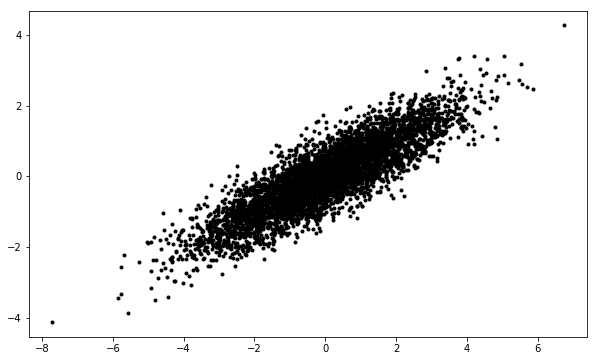

In [3]:
# data generation
m = 5000
mu = np.array([0, 0])   # 평균은 0
sigma = np.array([[3, 1.5], [1.5, 1]])   # covariance matrix

X = np.random.multivariate_normal(mu, sigma, m)
X = np.asmatrix(X)

fig = plt.figure(figsize=(10, 6))
plt.plot(X[:,0], X[:,1], 'k.')
plt.axis('equal')
plt.show()

In [6]:
S = 1/(m-1)*X.T*X    # sample covariace matrix
S = np.asmatrix(S)

print(X.shape)
print(S)

D, V = np.linalg.eig(S)

idx = np.argsort(-D) # 큰 것부터 정렬
D = D[idx]   # D[[0, 1]]
V = V[:, idx] # V[:, [0, 1]]

print(D)  # eigenvalue -> variance of projected data
print(V)   # eigenvector -> new axis

(5000, 2)
[[2.99661326 1.50231827]
 [1.50231827 1.00382776]]
[3.80292922 0.19751179]
[[ 0.88111287 -0.47290603]
 [ 0.47290603  0.88111287]]


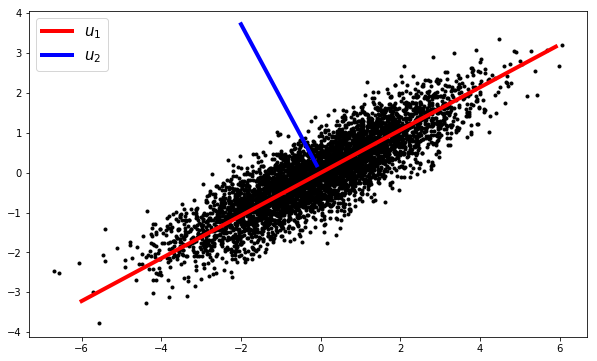

In [35]:
h = V[1, 0]/V[0, 0]
xp = np.arange(-6, 6, 0.1)
yp = h*xp      # principal component !
h1 = V[1, 1]/V[0, 1]
xp1 = np.arange(-2, 0, 0.1)
yp1 = h1*xp1

fig = plt.figure(figsize=(10, 6))
plt.plot(X[:,0], X[:,1], 'k.')
plt.plot(xp, yp, 'r', linewidth=4.0, label = '$u_1$')
plt.plot(xp1, yp1, 'b', linewidth=4.0, label = '$u_2$')
plt.axis('equal')
plt.legend(fontsize=15)
plt.show()

variance of Z onto u_1 : 3.720275888532643
variance of Z onto u_2 : 0.1979362091405208


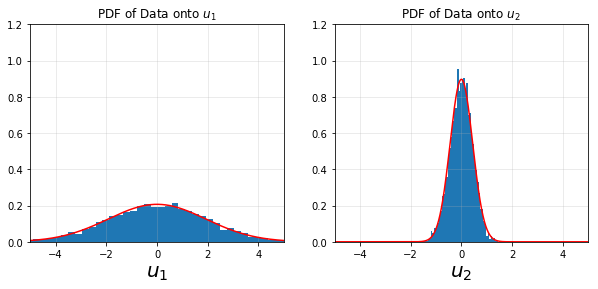

In [137]:
Z = X*V[:, 0]  # inner product u1축으로 projection
Z1 = X*V[:, 1]

v = np.std(Z)
v1 = np.std(Z1)
print("variance of Z onto u_1 :", v**2)
print("variance of Z onto u_2 :", v1**2)

x = np.linspace(-6, 6, 5000)

def g_mu0(v):
    g = 1/(v*np.sqrt(2*np.pi))*np.exp(-x**2/(2*v**2))
    return g

plt.figure(figsize=(10, 4))
plt.subplot(1,2,1)
plt.title("PDF of Data onto $u_1$")
plt.plot(x, g_mu0(v), 'r')
plt.hist(Z, 51, density='True')
plt.xlabel('$u_1$', fontsize=20)
plt.axis([-5, 5, 0, 1.2])
plt.grid(alpha=0.3)
plt.subplot(1,2,2)
plt.title("PDF of Data onto $u_2$")
plt.plot(x, g_mu0(v1), 'r')
plt.hist(Z1, 51, density='True')
plt.xlabel('$u_2$', fontsize=20)
plt.axis([-5, 5, 0, 1.2])
plt.grid(alpha=0.3)
plt.show()